# Project: Investigate a Dataset (TMDb_Movies Dataset)

<h4>DataSet used: TMDB movie data (<a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1535239413276000">TMDB_CSV file</a>) </h4>


<h3>Questions to be analyzed:</h3>
> 
> 1. Avg movie run time.
> 2. year of porfitable movies
> 3. Movies which had most and least profit, budget ranges
> 4. Movies with most and least earned revenu and run time ranges.
> 5. profitable movies successful genres
> 6. Average budget and revenue of movies
> 7. cast majoring.





In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv


<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. 
> .

### General Properties

In [2]:

tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows 
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<h3>Dataset Obsevation:</h3>

<ul>
  <li>initial cleansing:Assuming columns (budget,revenue, budject_adj and revenue_adj) are dollar amounts, as unit of measurement is missing,treating them as dollar amount</li>
  <li>Remove unused columns such as id, imdb_id, vote_count, production_company, keywords, homepage etc.</li>
  <li>Changing release date column into date format.</li></li>
  <li>Replacing zero with NAN</li>
  <li>Changing format of budget and revenue column.</li>
</ul>

In [3]:
# Get total record counts.
rec, columns = tmdb_data.shape
print("*"*40,"\n")
print("Number of rows :" ,rec)
print("Number of columns :", columns,"\n")
print("*"*40,"\n")
#Remove duplicate rows (http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html)
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rec_d, col_d =  tmdb_data.shape
print("Number of rows after duplciates are removed:" ,rec_d)
print("------Total Number of duplicate rows:" ,abs(rec-rec_d))
print("*"*40,"\n")

#Remove unused/not required columns as they dont provide any value. 
col_del=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting columns in the above col_del list[] #(http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop.html)
tmdb_data= tmdb_data.drop(col_del,1)

#Dataset after removing unused columns
#print(tmdb_df.head())
rec_c, col_c =  tmdb_data.shape
print("Number of columns :", col_c,"\n")
print("------Total Number of columns REMOVED:" ,abs(col_c-columns))
print("*"*40,"\n")
tmdb_data.head()

**************************************** 

Number of rows : 10866
Number of columns : 21 

**************************************** 

Number of rows after duplciates are removed: 10865
------Total Number of duplicate rows: 1
**************************************** 

Number of columns : 10 

------Total Number of columns REMOVED: 11
**************************************** 



,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


>  **Removing the duplicacy in the rows(if any).**


In [4]:
rows, col = tmdb_data.shape
print('There are {}  entries of movies and {} columns#'.format(rows-1, col))

There are 10864  entries of movies and 10 columns#


In [5]:
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape

print('There are {}  entries of movies and {} columns#'.format(rows-1, col))

There are 10864  entries of movies and 10 columns#


In [6]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


> **Release date column formatted to date format**

In [7]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [8]:
# print first 5 rows
tmdb_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


>** Null values replaced to NAN.**


In [9]:

tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

>** Changing format of budget and revenue column.**

In [10]:
#checking columns and there types
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
change_type=['budget', 'revenue']
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<H4>############################ DATA EXPLORATION ################################</H4>


> **1. Calculating the profit of the each movie**

In [12]:

tmdb_data.insert(2,'profits_earned',tmdb_data['revenue']-tmdb_data['budget'])

tmdb_data.head(2)

,budget,revenue,profits_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


###  Movies profit comparision

In [13]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profits_earned')
    


,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profits_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


> we can observer that Column 1386 indicates  highest profit earned and id 2244 indicates lowest.


###  Movies with largest and lowest budgets

In [14]:

calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profits_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Movies with most and least earned revenue

In [15]:
# reuse funciton for better portability
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profits_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### Movies with longest and shortest runtime

In [16]:
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profits_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


> Column 2107 indicates longest and 5162 indicates shortest runtime.


### Average runtime of the movies

In [17]:
def mov_avg(column):
    return tmdb_data[column].mean()

In [18]:

mov_avg('runtime')

109.22029060716139

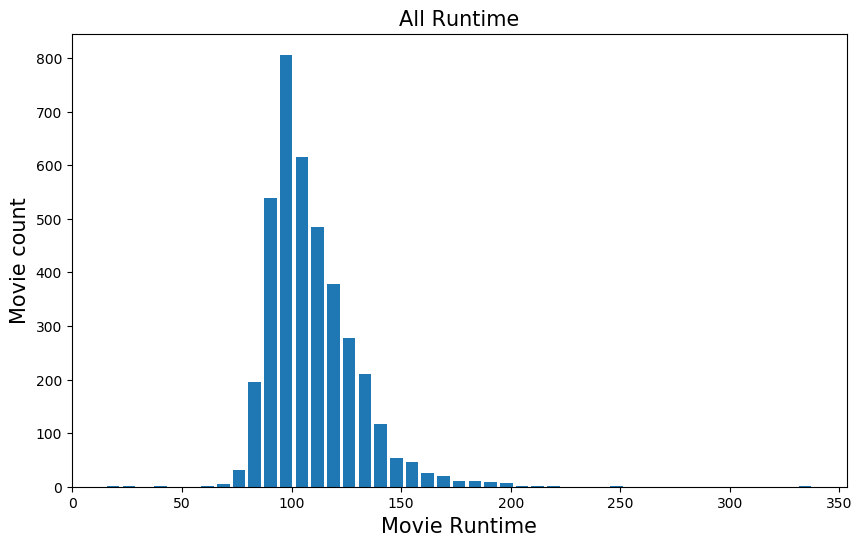

In [27]:
#Let's do some plotting to have visualization

plt.figure(figsize=(10,6), dpi = 100)

plt.xlabel('Movie Runtime', fontsize = 15)
plt.ylabel('Movie count', fontsize=15)
plt.title('All Runtime', fontsize=15)

plt.hist(tmdb_data['runtime'], rwidth = 0.8, bins =45)
plt.show()

> observation: Most of the movies are  between 80 to 115 minutes. Almost 1000 comes in this criteria 
>
>**Lets do some more visual by using differetn graphs ex: Box Plot **


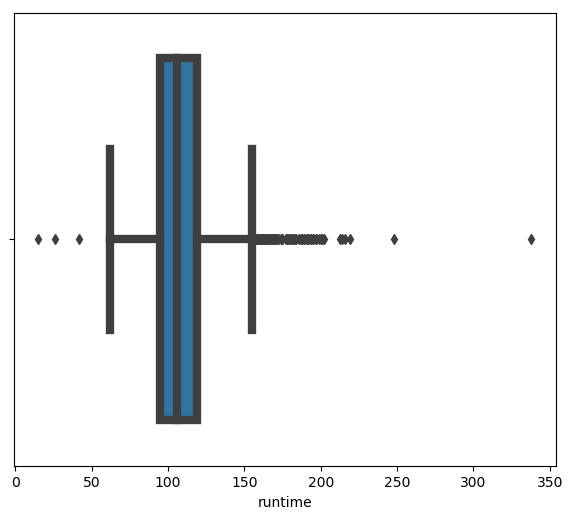

In [25]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(7,6), dpi = 100)

#using seaborn to generate the boxplot
sns.boxplot(tmdb_data['runtime'], linewidth = 6)
#diplaying the plot
plt.show()


In [28]:
#getting specific runtime 
tmdb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

> Observation:  
> 1. 25% of movies have a runtime of less than 95 minutes
> 2. 50% of movies have a runtime of less than 109 minutes
> 3. 75% of movies have a runtime of less than 119 minutes


### Year of release vs Profitability

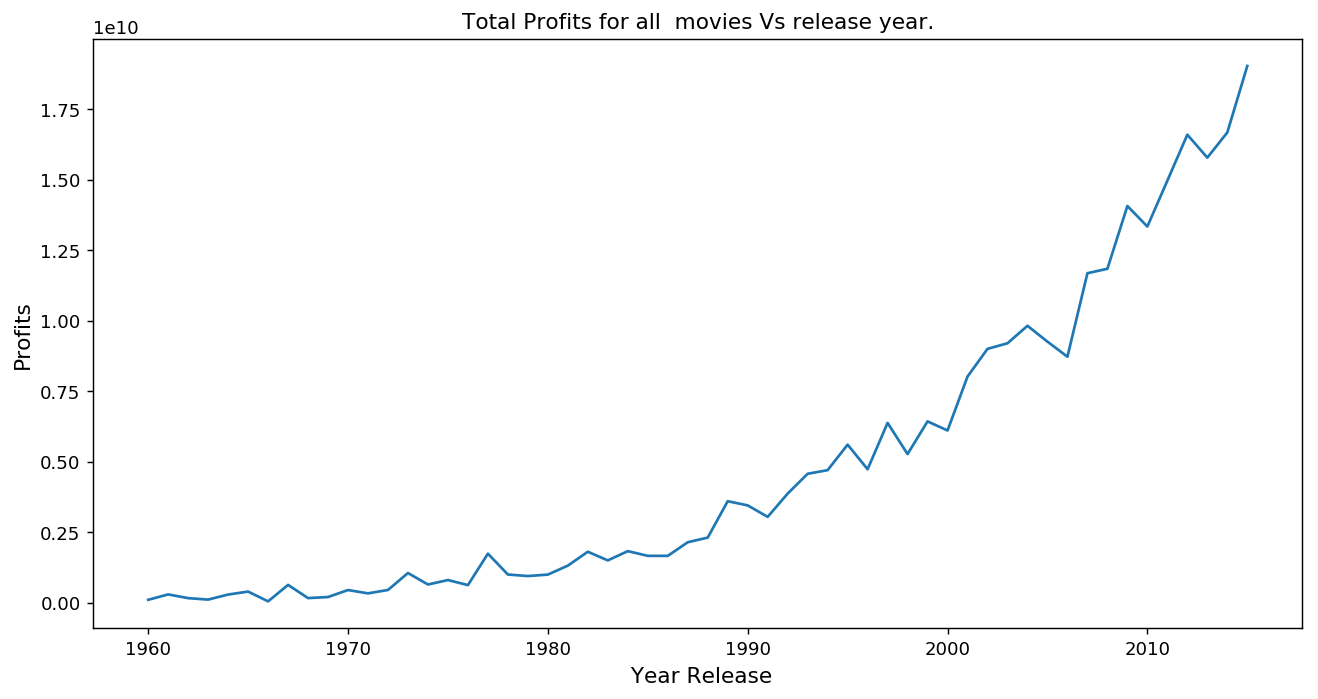

In [31]:

profits_year = tmdb_data.groupby('release_year')['profits_earned'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel(' Year Release', fontsize = 12)
plt.ylabel('Profits', fontsize = 12)
plt.title('Total Profits for all  movies Vs release year.')
plt.plot(profits_year)
plt.show()

In [32]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

> observations:  year 2015 was the year where movies made the highest profit.






>### Data Wrangling
>
> **To further filter the data to get some sort of significance, We will be considering only those movies who have earned a 50 million profit.** 
>

In [34]:
profit_data = tmdb_data[tmdb_data['profits_earned'] >= 50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1

profit_data.head(5)

,budget,revenue,profits_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [55]:
#counting the no.of rows in the new data base
len(profit_data)

1338

> Observation: dataset is reduced to 1338 from 3853

### **Succesful Genres**

In [35]:
#function to track any column
def data(column):
    #delimiter is '\'
    data = profit_data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [36]:
count = data('genres')
#printing  values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

> Lets to a graphical analysis of the above collected data.

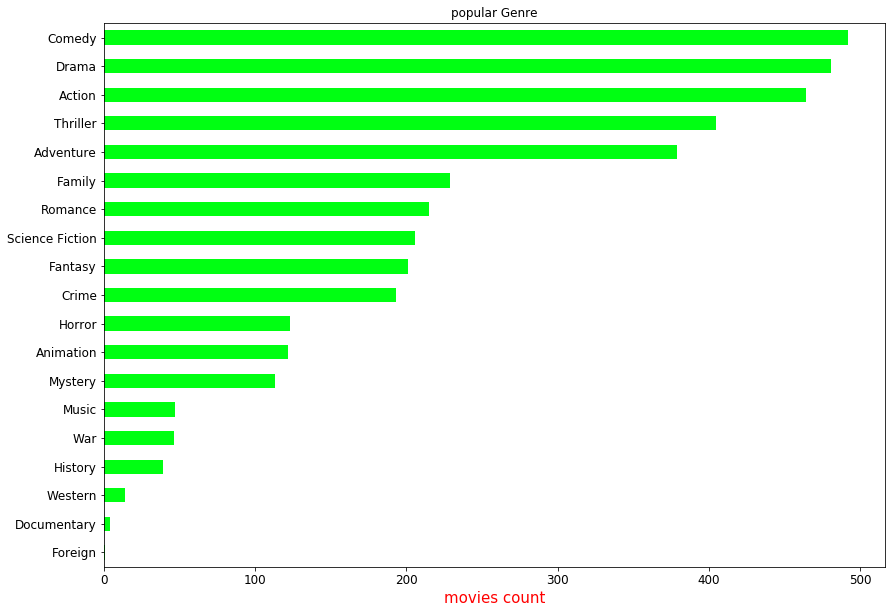

In [45]:
count.sort_values(ascending = True, inplace = True)

#ploting data based on above value
xy = count.plot.barh(color = '#00FF12', fontsize = 12)
xy.set(title = 'popular Genre')
xy.set_xlabel('movies count', color = 'Red', fontsize = '15')

xy.figure.set_size_inches(14, 10)

plt.show()

### Popular Cast

In [46]:
count = data('cast')
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> Observation:  Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.  

### Avg Budget of the movies

In [47]:
def profit_avg(column):
    return profit_data[column].mean()

In [50]:
profit_avg('budget')


60444957.76083707

> Based on above data wrangling we have filter our data to only have movies greater than 50 million for this analysis and it shows that the avg profit with that set is 60 million.

In [51]:
### Average Revenue earned by the movies
profit_avg('revenue')

254957662.59491777

### Avg duration of the movies



In [53]:
profit_avg('runtime')

113.66741405082212

>**Limitations: **Analysis was performed considering the movies which had a approximately ~50 million dollar. Analysis may not be 100% accurate or error free but but defintely gives the probability of a movie to become success. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As described in the data wrangling section of my analysis, before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a discrapancy arises here which can describe the whole analysis wrong. Dropping rows with missing values also affected the overall analysis and truly was done to accomodate proper analysis. Data plays an important role to have better probability so my views(limitations)  were based on that.


<a id='conclusions'></a>
## FInal Conclusions
> Here is the initial data analysis based on data wrangle and some math calcualtions
> **Fo consider a movie as success:**
 
> 1. Movie cast should be one of the foll :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
> 2. Avg Budget must be around ~60 millon dollar
> 3. Avg duration of the movie must be 113 minutes
> 4. Genre must be : Action, Adventure, Thriller, Comedy, Drama.
>
> By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million  dollar.


